# Machine Learning Terapan 2 - Aldiansyah Satrio Kabisat

# Data Loading

In [1]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aldisk","key":"ac3e34525dca86ce637470669123678a"}'}

Import key kaggle

In [2]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/kaggle.json

!chmod 600 ~/.kaggle/kaggle.json

Memindahkan key kaggle ke direktori kaggle

In [3]:
!kaggle datasets download parasharmanas/movie-recommendation-system

 96% 159M/165M [00:02<00:00, 62.5MB/s]
100% 165M/165M [00:02<00:00, 65.8MB/s]


Mengunduh dataset

In [4]:
!mkdir dataset
!unzip movie-recommendation-system.zip -d ./dataset

Archive:  movie-recommendation-system.zip
  inflating: ./dataset/movies.csv    
  inflating: ./dataset/ratings.csv   


Mengekstrak dataset

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/movies.csv')

Membaca file menggunakan pandas

# Preliminary Data Analysis and Preprocessing

In [6]:
df.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


Mengecek struktur file yang ada

In [7]:
# Check for duplicates in the 'title' column
duplicate_titles = df[df.duplicated(subset=['title'], keep=False)]

duplicate_titles['title']

580             Aladdin (1992)
1710      Men with Guns (1997)
2553            Dracula (1931)
2759           Saturn 3 (1980)
3454             Gossip (2000)
                 ...          
61525      Lost & Found (2018)
61697            Camino (2016)
61714    American Woman (2019)
61800        The Plague (2006)
61913    American Woman (2019)
Name: title, Length: 196, dtype: object

Mengecek apakah ada data duplikat, Terdapat beberapa duplikat yang ditemukan

In [8]:
# Remove duplicates in the 'title' column
df_unique_titles = df.drop_duplicates(subset=['title'])

Menghapus data yang duplikat

In [9]:
df_unique_titles.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

Tidak ada data dengan nilai null

In [10]:
df_unique_titles[df_unique_titles['genres'].str.contains('no genres listed')]

,movieId,title,genres
15881,83773,Away with Words (San tiao ren) (1999),(no genres listed)
16060,84768,Glitterbug (1994),(no genres listed)
16351,86493,"Age of the Earth, The (A Idade da Terra) (1980)",(no genres listed)
16491,87061,Trails (Veredas) (1978),(no genres listed)
17404,91246,Milky Way (Tejút) (2007),(no genres listed)
...,...,...,...
62400,209101,Hua yang de nian hua (2001),(no genres listed)
62401,209103,Tsar Ivan the Terrible (1991),(no genres listed)
62407,209133,The Riot and the Dance (2018),(no genres listed)
62415,209151,Mao Zedong 1949 (2019),(no genres listed)


Terdapat beberapa data yang tidak memiliki genre tertulis

In [11]:
df_filtered = df_unique_titles[~df_unique_titles['genres'].str.contains('no genres listed')]

df_filtered.reset_index(drop=True, inplace=True)

df_filtered

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
57268,209155,Santosh Subramaniam (2008),Action|Comedy|Romance
57269,209157,We (2018),Drama
57270,209159,Window of the Soul (2001),Documentary
57271,209163,Bad Poems (2018),Comedy|Drama


Data tanpa genre dihapus

In [12]:
df_filtered['genres'] = df_filtered['genres'].str.split('|')

<ipython-input-12-fb11a03988d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['genres'] = df_filtered['genres'].str.split('|')


Tokenisasi genre agar dapat dibaca sebagai list

In [13]:
df_filtered

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
57268,209155,Santosh Subramaniam (2008),"[Action, Comedy, Romance]"
57269,209157,We (2018),[Drama]
57270,209159,Window of the Soul (2001),[Documentary]
57271,209163,Bad Poems (2018),"[Comedy, Drama]"


In [14]:
# Flatten the list of genres
all_genres = [genre for sublist in df_filtered['genres'] for genre in sublist]

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

Mendapatkan jumlah tiap genre untuk plotting

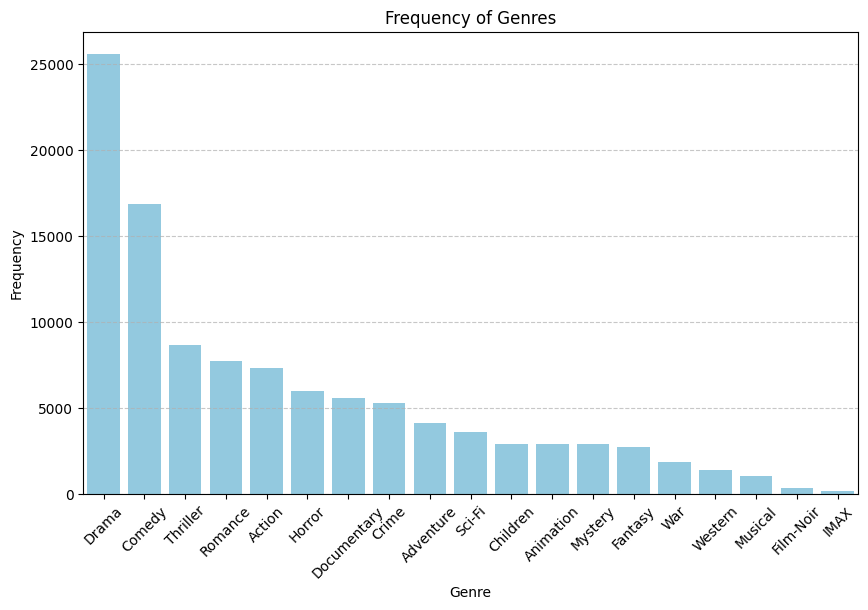

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, color='skyblue')
plt.title('Frequency of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Plotting setiap frekuensi genre

In [16]:
def jaccard_similarity(movie1_genres, movie2_genres):
    set1 = set(movie1_genres)
    set2 = set(movie2_genres)
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

def get_recommendation(df, movie_id, n):
    similarities = {}
    movie1_genres = df.loc[df['movieId'] == movie_id, 'genres'].iloc[0]

    for index, row in df.iterrows():
        if row['movieId'] != movie_id:
            movie2_genres = row['genres']
            similarity = jaccard_similarity(movie1_genres, movie2_genres)
            similarities[row['title']] = similarity

    top_n_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:n]
    return top_n_similarities

Mendefinisikan fungsi untuk mencari kemiripan film menggunakan Jaccard Similiarity dan mendapatkan rekomendasi berdasarkan film dengan index Jaccard Similiarity tertinggi

In [21]:
id=1

title = df.loc[df['movieId'] == id, 'title'].iloc[0]

recommendation = get_recommendation(df_filtered, movie_id=id, n=10)
print(f"Movie Similiar to {title}:")
for movie, similarity in recommendation:
    print(movie, "-", similarity)

Movie Similiar to Toy Story (1995):
Antz (1998) - 1.0
Toy Story 2 (1999) - 1.0
Adventures of Rocky and Bullwinkle, The (2000) - 1.0
Emperor's New Groove, The (2000) - 1.0
Monsters, Inc. (2001) - 1.0
DuckTales: The Movie - Treasure of the Lost Lamp (1990) - 1.0
Wild, The (2006) - 1.0
Shrek the Third (2007) - 1.0
Tale of Despereaux, The (2008) - 1.0
Asterix and the Vikings (Astérix et les Vikings) (2006) - 1.0


In [22]:
id=88140

title = df.loc[df['movieId'] == id, 'title'].iloc[0]

recommendation = get_recommendation(df_filtered, movie_id=id, n=10)
print(f"Movie Similiar to {title}:")
for movie, similarity in recommendation:
    print(movie, "-", similarity)

Movie Similiar to Captain America: The First Avenger (2011):
X-Men: First Class (2011) - 1.0
Jurassic Park (1993) - 0.8
Independence Day (a.k.a. ID4) (1996) - 0.8
Escape from L.A. (1996) - 0.8
Abyss, The (1989) - 0.8
Escape from New York (1981) - 0.8
Star Trek: First Contact (1996) - 0.8
Star Trek II: The Wrath of Khan (1982) - 0.8
Lost World: Jurassic Park, The (1997) - 0.8
Spawn (1997) - 0.8


Menguji coba sistem rekomendasi pada data acak

Dari ujicoba diatas didapatkan sistem rekomendasi sederhana berbasis kontent (content-based) menggunakan Jaccard Similiarity. Secara umum sistem telah dapat merekomendasikan sistem dengan genre serupa. Hal ini dapat dilihat dengan sebagian besar film yang direkomendasikan merupakan film dari studio yang sama dan menargetkan audien yang sama. Meskipun tergolong sederhana sistem rekomendasi sudah dapat digunakan pada kasus nyata yang memerlukan sistem rekomendasi yang cepat dan scalable